# Problem Statement

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [2]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [3]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("cubic_zirconia.csv")  

### EDA

In [30]:
# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [31]:
# drop the id column as it is useless for the model
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26958 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  object 
 2   color    26958 non-null  object 
 3   clarity  26958 non-null  object 
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [43]:

df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26958.000000,26958,26958,26958,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5658,6570,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798190,NaN,NaN,NaN,61.745340,57.455342,5.730105,5.733832,3.539238,3938.311262
std,0.477602,NaN,NaN,NaN,1.394016,2.231227,1.126714,1.164342,0.717838,4023.359737
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,NaN,NaN,NaN,61.100000,56.000000,4.710000,4.712500,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5358.000000


In [35]:
df = df.replace(0, np.nan)
# 

### unique values for categorical variables

In [10]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




### Converting categorical to Codedvariables

In [44]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [12]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [45]:
# Are there any missing values ?
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Imputing missing values

In [41]:
mean = df["depth"].mean()
df["depth"] = df["depth"].fillna(mean)    
df.dropna(inplace=True)
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [16]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [15]:
df.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,2.554604,2.606111,3.833537,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.024243,1.705992,1.724904,1.394481,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,2.000000,1.000000,2.000000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,3.000000,4.000000,5.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,4.000000,6.000000,7.000000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### Checking for duplicates

In [17]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 34


In [18]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26967, 10)
After (26933, 10)


In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

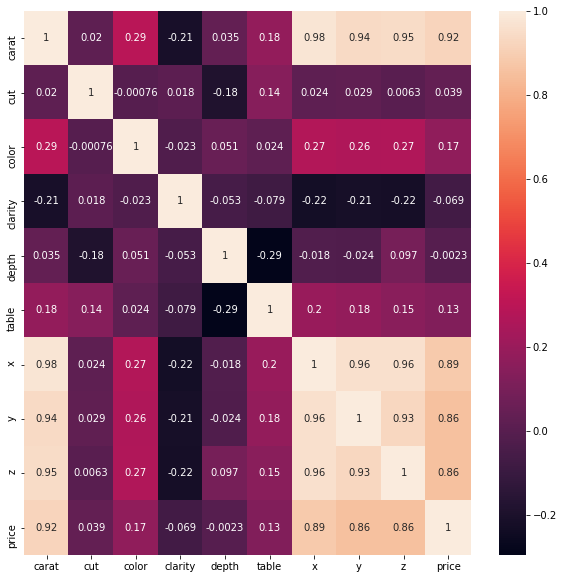

In [53]:
plt.subplots(figsize=(10,10),)
sns.heatmap(df.corr(),annot=True)
plt.show()

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


In [19]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


### Outlier Checks

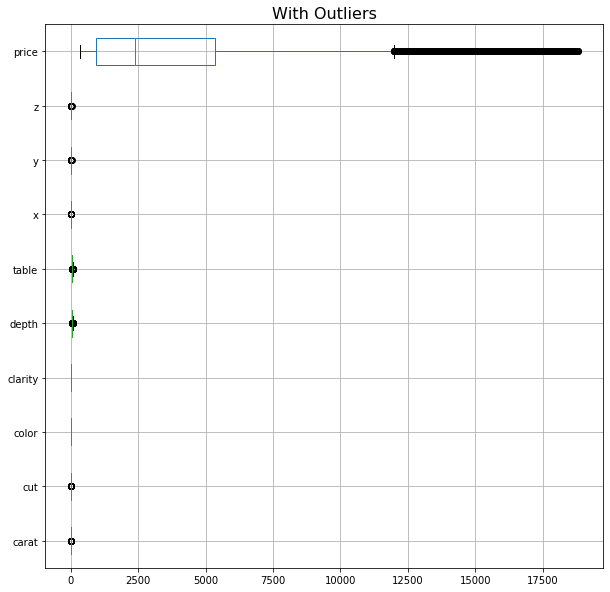

In [54]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [55]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [56]:
for column in df[cont].columns:
    if(df[column].dtypes!=object):
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

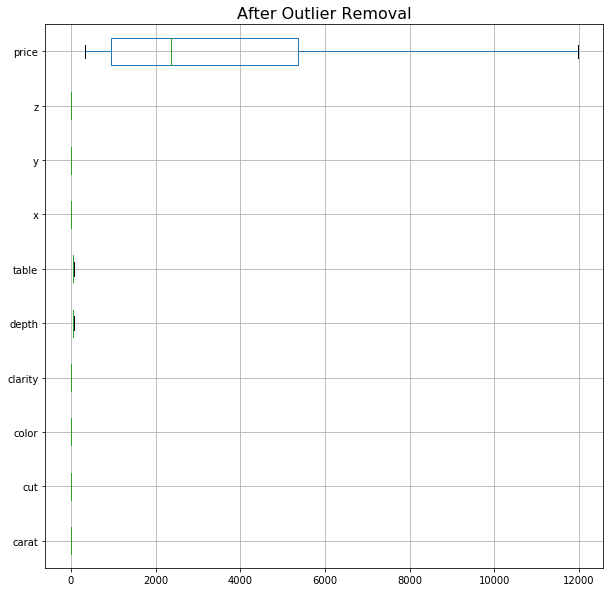

In [57]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

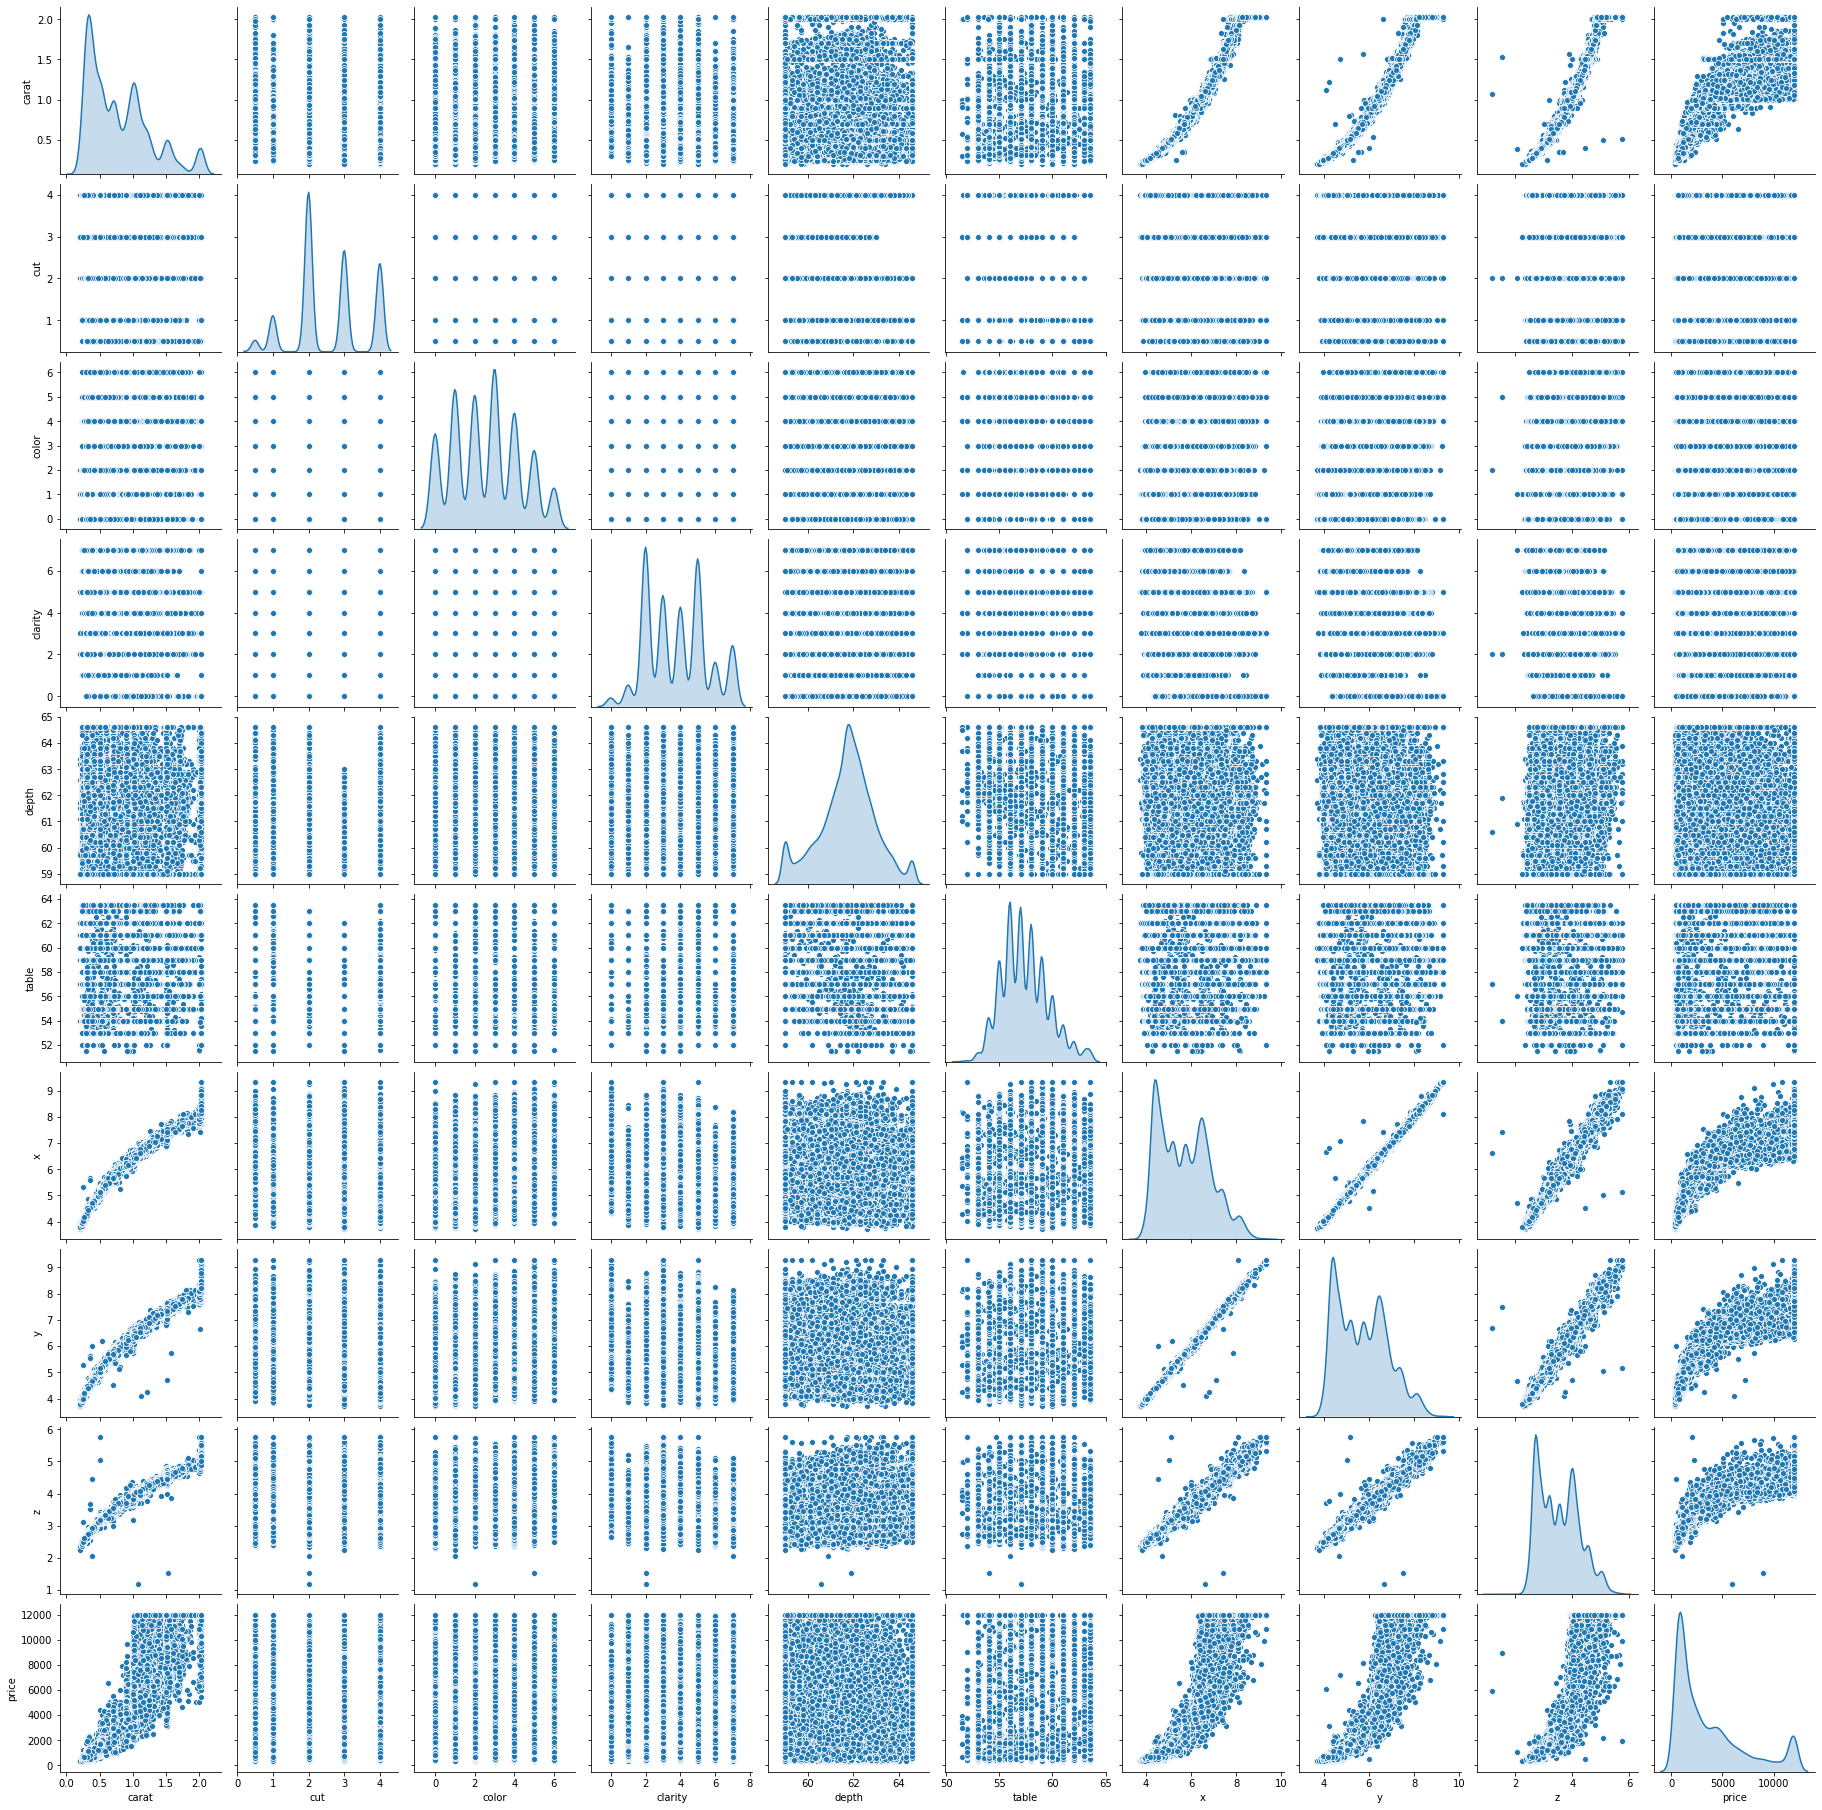

In [60]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Train-Test Split

In [69]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [70]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,2.0,1.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,1.0,60.8,58.0,4.42,4.46,2.70
2,0.90,4.0,1.0,7.0,62.2,60.0,6.04,6.12,3.78
3,0.42,2.0,2.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,2.0,2.0,6.0,60.4,59.0,4.35,4.43,2.65


In [71]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [73]:
# invoke the LinearRegression function and find the bestfit model on training data
regModel= LinearRegression()
regModel.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
# Let us explore the coefficients for each of the independent attributes
for idx,col in enumerate(X_train.columns):
    print("The coefficient for "+col,regModel.coef_[0][idx])

NameError: name 'regModel' is not defined

In [52]:
# Let us check the intercept for the model

intercept = regModel.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 9175.637050655196


In [53]:
# R square on training data
regModel.score(X,y)


0.9096509837813009

In [54]:
regModel.intercept_[0]

9175.637050655196

In [55]:
# R square on testing data
regModel.score(X_test,y_test)


0.9130281960820806

In [56]:
#RMSE on Training data
predPrice=regModel.fit(X_train,y_train).predict(X_train)
mse=metrics.mean_squared_error(y_train,predPrice)
np.sqrt(mse)



1046.8423105652398

In [57]:
#RMSE on Testing data
predPrice=regModel.fit(X_test,y_test).predict(X_test)
mse=metrics.mean_squared_error(y_test,predPrice)
np.sqrt(mse)




1028.4320460001943

### Linear Regression using statsmodels

In [74]:
# concatenate X and y into a single dataframe
data_train=pd.concat([X_train,y_train],axis=1)
data_test=pd.concat([X_test,y_test],axis=1)


In [59]:
data_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [63]:
expr= 'price ~ carat+cut+color+clarity+depth+table+x+y+z'


In [5]:
import statsmodels.formula.api as smf
smlLinearModel=smf.ols(formula=expr,data=df).fit()
smlLinearModel.params

NameError: name 'expr' is not defined

In [65]:
print(smlLinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 3.019e+04
Date:                Sun, 05 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:11:59   Log-Likelihood:            -2.2558e+05
No. Observations:               26958   AIC:                         4.512e+05
Df Residuals:                   26948   BIC:                         4.513e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5956.5264    730.068      8.159      0.0

In [4]:
# Calculate MSE
mse=np.mean(smlLinearModel.predict(data_train.drop('price',axis=1))-data_train['price']**2)

NameError: name 'smlLinearModel' is not defined

In [65]:
#Root Mean Squared Error - RMSE
predPrice=regModel.fit(X_test,y_test).predict(X_test)
mse=metrics.mean_squared_error(y_test,predPrice)
np.sqrt(mse)

1028.4320460001943

In [66]:
np.sqrt(smlLinearModel.mse_resid) #another way

1042.6519184940853

In [75]:
# Prediction on Test data
y_pred = smlLinearModel.predict(data_test)
y_pred

26809     4661.095120
10087     4131.042687
22817     1284.355417
21676     3857.614340
14846     6348.175406
             ...     
15037     6461.240167
3190      5655.883745
23438     5045.938001
18963    12362.067777
4         1003.904953
Length: 6740, dtype: float64

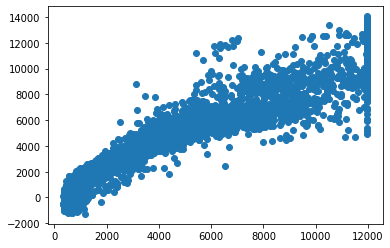

In [76]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [70]:
for i,j in np.array(smlLinearModel.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(9175.64) * Intercept + (9140.74) * carat + (47.42) * cut + (-228.53) * color + (252.7) * clarity + (-85.16) * depth + (-72.66) * table + (-1943.34) * x + (1508.17) * y + (-357.25) * z + 

 # Conclusion

The final Linear Regression equation is  
  
<b>price = b0 + b1 * carat + b2 * cut + b3 * color + b4 * clarity + b5 * depth + b6 * table + b7 * x + b8 * y + b9 * z </b>
  
<b>price = (9175.64) * Intercept + (9140.74) * carat + (47.42) * cut + (-228.53) * color + (252.7) * clarity + (-85.16) * depth + (-72.66) * table + (-1943.34) * x + (1508.17) * y + (-357.25) * z</b>  
  
When carat increases by 1 unit, price increases by 9140.74 units, keeping all other predictors constant.  
similarly, when clarity increases by 1 unit, price increases by 252.7 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, color has its corresponding co-efficient as -228.53. This implies, when the color is different, the price decreases by 228.53 units, keeping all other predictors constant.



## post Scaling the data

In [73]:
from sklearn.preprocessing import scale

In [84]:
X=scale(X)
X

array([[-1.06747072, -0.54174828, -0.94099942, ..., -1.29584662,
        -1.28898214, -1.25861627],
       [-1.00255226,  0.43455861,  0.2314354 , ..., -1.16264994,
        -1.13694318, -1.20120602],
       [ 0.23089845,  1.4108655 , -0.94099942, ...,  0.27587417,
         0.34767256,  0.3488707 ],
       ...,
       [-0.61304151,  0.43455861, -0.94099942, ..., -0.54106545,
        -0.51984387, -0.5266356 ],
       [-1.13238917,  1.4108655 , -0.35478201, ..., -1.36688485,
        -1.36947335, -1.34473165],
       [ 0.98828046,  0.43455861,  1.99008764, ...,  1.03953513,
         1.02737614,  1.05214625]])

In [78]:
regModel=LinearRegression()
regModel.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [77]:
regModel.score(X,y)

0.9096509837813009

In [80]:
regModel.score(X_test,y_test)

0.9130281960820806

In [81]:
predPrice=regModel.fit(X_train,y_train).predict(X_train)
mse=metrics.mean_squared_error(y_train,predPrice)
np.sqrt(mse)

1046.8423105652398

In [82]:
predPrice=regModel.fit(X_test,y_test).predict(X_test)
mse=metrics.mean_squared_error(y_test,predPrice)
np.sqrt(mse)

1028.4320460001943

In [83]:
print(smlLinearModel.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 3.012e+04
Date:                Sat, 04 Jul 2020   Prob (F-statistic):               0.00
Time:                        22:14:46   Log-Likelihood:            -2.2538e+05
No. Observations:               26933   AIC:                         4.508e+05
Df Residuals:                   26923   BIC:                         4.509e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9175.6371    609.853     15.046      0.0

,carat,cut,color,clarity,depth,table,x,y,z,price
